## **Mastering the Epsilon Equation**

Using epsilon effectively in your analysis of data privacy and method performance is crucial for several reasons, and comparing different values of epsilon can yield valuable insights. Here are some points to consider:

1. **Privacy Preservation:** Effective use of epsilon is crucial for preserving data privacy, safeguarding sensitive information, and complying with privacy regulations.

2. **Data Utility:** The choice of epsilon impacts the utility of the data. It's essential to strike the right balance between privacy and utility. By comparing different epsilon values, you can identify the sweet spot where you maximize data utility while preserving privacy.

3. **Method Performance Enhancement:** Different epsilon values can significantly impact the performance of data analysis methods. Comparing these values enables the fine-tuning of methods for optimal results.

4. **Accuracy vs. Privacy Trade-off:** Epsilon selection involves a trade-off between accuracy and privacy. Analyzing various values helps in understanding and managing this trade-off effectively.

If you're ready to embark on an exciting voyage through the fascinating realm of data, where epsilon values are your guiding stars, then this notebook is your compass. Discover the art of precision in data analysis, unlock hidden insights, and redefine your data-driven journey. It's time to explore, analyze, and transform the future of data with us. Dive in now!

## **Getting Started: Install, Import & Connect to Antigranular**

In [ ]:
!pip install antigranular_enterprise -U 1> /dev/null 2> /dev/null
import antigranular_enterprise as ag
import pandas as pd

# These details will be used going forward, you can have and toggle between multiple profiles
ag.load_config(
    "https://<config_url>/config/client", profile="default"
)

#Login to AGENT
session = ag.login(api_key="<api_key>")

Your request is pending approval. Please visit the following URL to approve the request: http://agent-dev.antigranular.com
Request approved.
Connected to Antigranular server session id: 1b4983b3-185a-4102-bfe7-73fc1ab761b9
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server


#### Adding necessary imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **How does epsilon affect accuracy ?**

Epsilon in differential privacy is a parameter that measures the privacy guarantee provided when releasing statistical information about a dataset. Here's a more detailed explanation:

1. **Definition of Epsilon (ε):**
   Epsilon is a non-negative parameter that quantifies the level of privacy loss in differential privacy. It's a way of describing how much the probability of a certain output changes when an individual's data is included or excluded from a dataset. The smaller the value of ε, the higher the level of privacy, because the presence or absence of a single individual's data in the dataset has a smaller impact on the output of the analysis.

2. **Effect on Privacy:**
   - A smaller epsilon (ε) means better privacy because it makes the outputs of the algorithm less sensitive to any single individual's data.
   - A larger epsilon provides less privacy because it allows more differentiation based on an individual's data.

3. **Effect on Accuracy:**
   - When ε is small, the noise added to the result to maintain privacy is typically larger, which can decrease the accuracy of the output.
   - Conversely, a larger ε usually means less noise is added, making the output more accurate but less private.

4. **Trade-off:**
   There's a fundamental trade-off between privacy and accuracy in differential privacy. Lowering ε increases privacy but adds more noise, which can reduce the accuracy of the statistical analysis. Increasing ε reduces the amount of noise, which can improve accuracy but at the cost of privacy.

In the context of data analysis, choosing the value of epsilon is critical and often challenging. It requires balancing the need for accurate statistical results with the requirement to protect individuals' privacy. The appropriate value for epsilon varies depending on the context and sensitivity of the data, the privacy requirements of the individuals, and the acceptable level of accuracy for the analysis.



### Setting up dataset & utility functions

In [ ]:
%%ag
import pandas as pd
import numpy as np
from op_pandas import PrivateSeries
DP = {}
data = {
    100 : pd.Series(np.random.randint(1,10000,100)),
    1000 : pd.Series(np.random.randint(1,10000,1000)),
    10000 : pd.Series(np.random.randint(1,10000,10000)),
    100000 : pd.Series(np.random.randint(1,10000,100000)),
}

# Iteration along on various range of epsilon values.
epsi_list = [0.001 , 0.01, 0.1, 0.5, 1, 2.5 , 5, 7.5 , 10]
for d in [100,1000,10000,100000]:
    pdata = PrivateSeries(data[d])
    for epsilon in epsi_list:
      for j in ["sum","mean","median"]:
        temp = []
        for _ in range(30): # You can reduce the parameters if it consumes too much time.
          if j == "sum":
            temp.append(pdata.sum(eps = epsilon))
          if j == "mean":
            temp.append(pdata.mean(eps = epsilon))
          if j == "median":
            temp.append(pdata.median(eps = epsilon))
        if (d,j) not in DP.keys():
            DP[(d,j)] = []
        DP[(d,j)].append(temp)

export(DP , "DP")
export(data,"data")

Setting up exported variable in local environment: DP
Setting up exported variable in local environment: data


In [ ]:
# Utility function to calculate differentially private results.
epsi_list = [0.001 , 0.01, 0.1, 0.5, 1, 2.5 , 5, 7.5 , 10]
def util( size , mechanism , method):
    if mechanism == "sum":
        actual = data[size].sum()
    elif mechanism == "mean":
        actual = data[size].mean()
    else:
        actual = data[size].median()

    readings = DP[(size,mechanism)]

    answer = []
    for r in readings:
        if method == "RMSE":
            result = [(x-actual)**2 for x in r ]
            result = np.sqrt(np.mean(result))
            answer.append(result)
        if method == "RELERROR":
            result = [np.abs(x-actual) for x in r ]
            result = np.mean(result)/np.abs(actual)
            answer.append(100*result)
    return answer

### Visualizing the privacy-utility tradeoff 👁️
Let's construct a graph plotting the accuracy of a differentially private SUM computation against a range of epsilon values. Our dataset comprises approximately 10,000 records, a sizeable enough figure to observe meaningful trends in the trade-off. This visualization aims to capture how the privacy budget (epsilon) impacts the error rate, and thereby the utility, of the aggregated output from the SUM method.

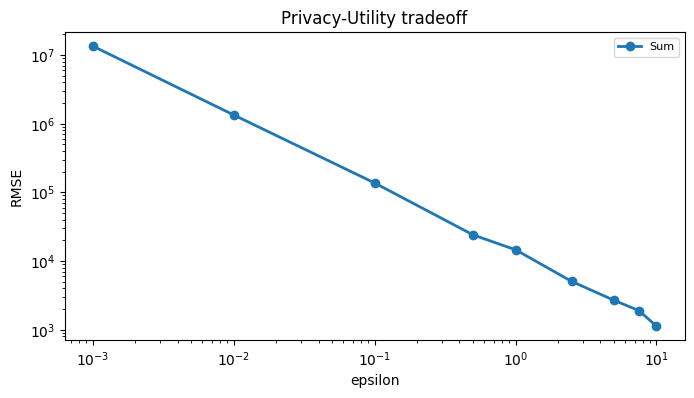

In [ ]:
plt.figure(figsize = (8,4))
plt.loglog(epsi_list, util(10000 ,"sum" , "RMSE") , marker='o', linestyle='-', linewidth=2, markersize=6, label = 'Sum')
plt.xlabel('epsilon')
plt.ylabel('RMSE')
plt.title('Privacy-Utility tradeoff')
plt.legend(loc='upper right', fontsize=8)
plt.show()

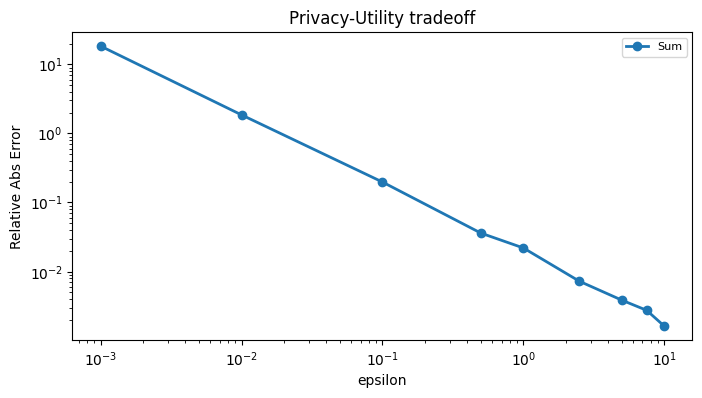

In [ ]:
plt.figure(figsize = (8,4))
plt.loglog(epsi_list, util(10000 ,"sum" , "RELERROR") , marker='o', linestyle='-', linewidth=2, markersize=6, label = 'Sum')
plt.xlabel('epsilon')
plt.ylabel('Relative Abs Error')
plt.title('Privacy-Utility tradeoff')
plt.legend(loc='upper right', fontsize=8)
plt.show()

#### Observation
- The epsilon vs. error plot for the SUM mechanism applied to a dataset demonstrates a clear trend: as the privacy budget, denoted by epsilon, increases, the accuracy of the sum computation improves.
- This is indicative of the intrinsic trade-off in differential privacy between data utility and privacy guarantees—higher epsilon values correspond to less noise addition and thus more precise results, albeit at the cost of reduced privacy.

### Will all mechanisms have same accuracy for a particular epsilon ?
Atomic operations such as `SUM` and `MEAN` are typically more accurate due to their direct computation methods. However, more complex statistical methods like `QUANTILES` often exhibit lower accuracy. This is primarily because these methods internally split the epsilon value—the privacy budget—across multiple computations, affecting the overall precision.

Lets visualize it using a plot !

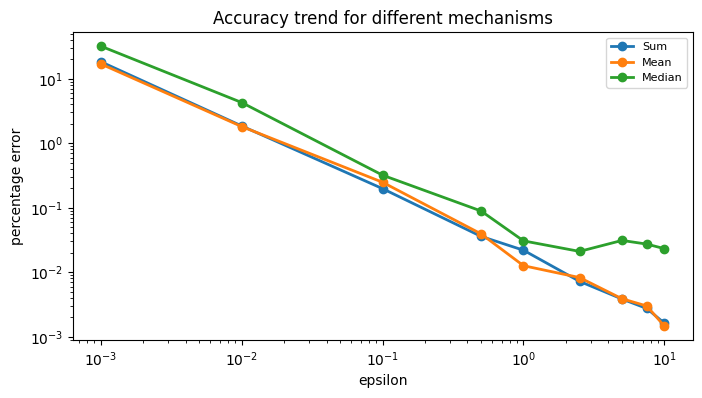

In [ ]:
plt.figure(figsize = (8,4))
plt.loglog(epsi_list, util(10000 ,"sum" , "RELERROR") , marker='o', linestyle='-', linewidth=2, markersize=6, label = 'Sum')
plt.loglog(epsi_list, util(10000 ,"mean" , "RELERROR"), marker='o', linestyle='-', linewidth=2, markersize=6, label = 'Mean')
plt.loglog(epsi_list, util(10000 ,"median" , "RELERROR"), marker='o', linestyle='-', linewidth=2, markersize=6, label = 'Median')
plt.xlabel('epsilon')
plt.ylabel('percentage error')
plt.title('Accuracy trend for different mechanisms')
plt.legend(loc='upper right', fontsize=8)
plt.show()

#### Observation

- The dataset of approximately 10,000 records exhibits a minimal error within 3% for the aggregate sum when the epsilon value is set between 0.1 and 0.5, indicating an effective range for balancing accuracy with privacy.
- Compared to the sum and mean mechanisms, the median mechanism shows a higher percentage of error for the same epsilon values. This is because the median is not an atomic operation but a probabilistic one that involves multiple atomic operations, each allocated a fraction of the total epsilon.
- Users can modify the existing code to incorporate custom functions, enabling them to explore the performance variability of different mechanisms based on the dataset size and epsilon allocation.

### What is sensitivity ?
Sensitivity in the context of differential privacy refers to the maximum change to the output of a function that can result from altering a single individual's data in the dataset. It measures how much impact a single record can have on the output, and thus, how much noise needs to be added to the output to mask the contribution of any single record to comply with differential privacy.

Here's how sensitivity affects the accuracy of a mechanism:

- **Low Sensitivity:** If a function has low sensitivity, the output does not change much with the modification or removal of a single record. Consequently, less noise is needed to achieve differential privacy, which generally results in more accurate outputs.

- **High Sensitivity:** High sensitivity means that a single record can significantly change the output. To maintain privacy, more noise must be added, which can lead to less accurate outputs because the added noise can mask the true signal more.

The level of sensitivity dictates the scale of the noise distribution used in the differential privacy mechanism. For example, in the Laplace mechanism, the amount of noise added is directly proportional to the sensitivity of the function and inversely proportional to the privacy budget epsilon. Thus, understanding and calculating the sensitivity of the function is crucial for balancing accuracy and privacy in differentially private data analysis.

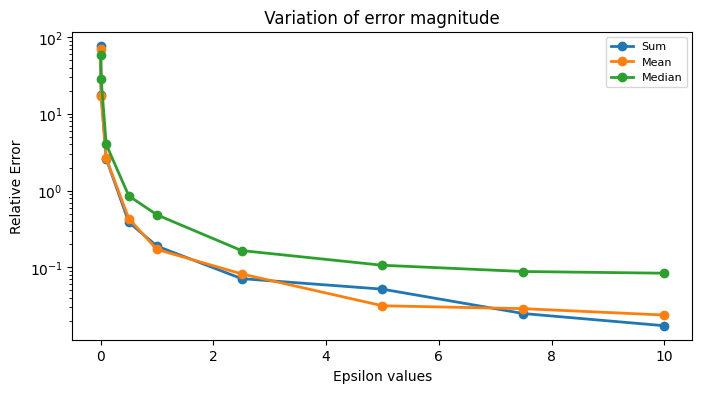

In [ ]:
plt.figure(figsize = (8,4))
plt.title(" Variation of error magnitude ")
plt.semilogy(epsi_list, util(1000 ,"sum" , "RELERROR") , marker='o', linestyle='-', linewidth=2, markersize=6, label = 'Sum')
plt.semilogy(epsi_list, util(1000 ,"mean" , "RELERROR"), marker='o', linestyle='-', linewidth=2, markersize=6, label = 'Mean')
plt.semilogy(epsi_list, util(1000 ,"median" , "RELERROR"), marker='o', linestyle='-', linewidth=2, markersize=6, label = 'Median')
plt.xlabel('Epsilon values')
plt.ylabel('Relative Error')
plt.legend(loc='upper right', fontsize=8)
plt.show()

#### Observation
 - Based on the above graph , we can observe that the magnitude of error in the mechanism decreases as we increase epsilon.  
 - It is important to note that for the same amount of epsilon and dataset size , `sum` has more magnitude error than `mean` or `median`.

 Sensitivity is basically the magnitude of change that can be brought onto a mechanism when we add or remove a random record from the dataset.

 ```
 Sensitivity(sum) = UPPER_BOUND - LOWER_BOUND
 Sensitivity(mean) =  (UPPER_BOUND - LOWER_BOUND)/(size)
 ```
 Clearly , mean varies less on a single record change due to which the noise magnitude added is fairly low for the same amount of epsilon. Hence , the lower Mean-Square-Error compared to `sum` mechanism.


## **Does accuracy depend on the size of the dataset ?**

Differentially private methods are designed to provide guarantees that the output of a statistical analysis does not compromise the privacy of individuals in the dataset. The behavior and effectiveness of these methods can indeed vary with the size of the dataset depending on the function of its sensitivity.

Differential privacy typically adds noise to the results of queries to mask the contributions of individuals. The amount of noise is often calibrated to the sensitivity of the query, which is a measure of how much the query result could change with the addition of or removal of a single individual's data. In larger datasets, the relative impact of a single individual's data is smaller, so less noise may be needed to achieve the same level of privacy.

Let's work out an example to see how the accuracy is affected for the same epsilon against different dataset sizes.

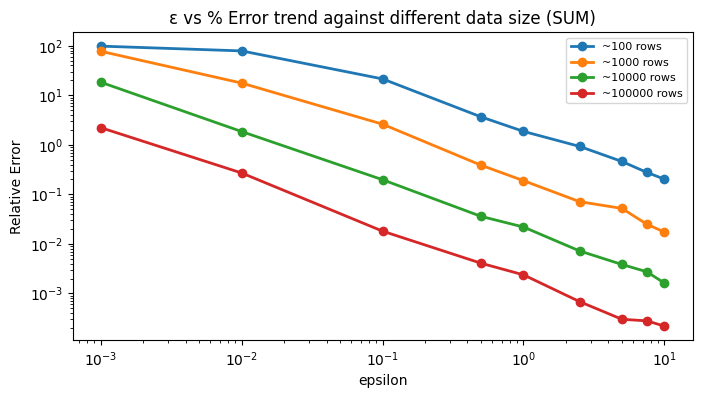

In [ ]:

plt.figure(figsize = (8,4))
plt.loglog(epsi_list, util(100,"sum" , "RELERROR"), marker='o', linestyle='-', linewidth=2, markersize=6, label = '~100 rows')
plt.loglog(epsi_list, util(1000,"sum" , "RELERROR"), marker='o', linestyle='-', linewidth=2, markersize=6, label = '~1000 rows')
plt.loglog(epsi_list, util(10000,"sum" , "RELERROR"), marker='o', linestyle='-', linewidth=2, markersize=6, label = '~10000 rows')
plt.loglog(epsi_list, util(100000,"sum" , "RELERROR"), marker='o', linestyle='-', linewidth=2, markersize=6, label = '~100000 rows')
plt.xlabel('epsilon')
plt.ylabel('Relative Error')
plt.title('ε vs % Error trend against different data size (SUM)')
plt.legend(loc='upper right', fontsize=8)
plt.show()




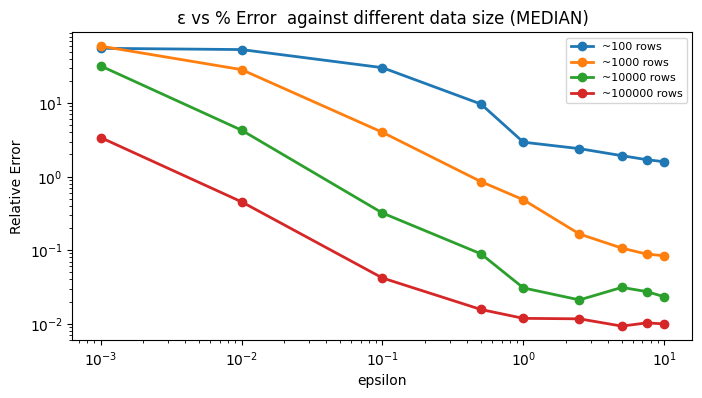

In [ ]:
plt.figure(figsize = (8,4))
plt.loglog(epsi_list, util(100,"median" , "RELERROR"), marker='o', linestyle='-', linewidth=2, markersize=6, label = '~100 rows')
plt.loglog(epsi_list, util(1000,"median" , "RELERROR"), marker='o', linestyle='-', linewidth=2, markersize=6, label = '~1000 rows')
plt.loglog(epsi_list, util(10000,"median" , "RELERROR"), marker='o', linestyle='-', linewidth=2, markersize=6, label = '~10000 rows')
plt.loglog(epsi_list, util(100000,"median" , "RELERROR"), marker='o', linestyle='-', linewidth=2, markersize=6, label = '~100000 rows')
plt.xlabel('epsilon')
plt.ylabel('Relative Error')
plt.title('ε vs % Error  against different data size (MEDIAN)')
plt.legend(loc='upper right', fontsize=8)
plt.show()

#### Observation
- Accuracy is heavily influenced by dataset size; larger datasets require less noise to maintain privacy, resulting in higher accuracy.
- In smaller datasets, individuals have a proportionally larger impact on results, necessitating more noise to ensure privacy, which decreases accuracy.
- Intuition : The likelihood of identifying an individual in a dataset of 10 is higher than in a dataset of 1000, illustrating why more noise is needed for privacy in smaller datasets at the same epsilon value.

## **In Conclusion: Mastering Epsilon for Data Insights**

1. **Method Comparison:** In the notebook, we conducted a thorough comparison of various data analysis methods available within the op_pandas library. This comparison allowed us to understand the strengths and weaknesses of each method.

2. **Epsilon Variation:** We explored how different values of epsilon impact the performance of these data analysis methods. By varying epsilon, we gained insights into how data privacy and data utility can be balanced.

3. **Dataset Size Variation:** Our analysis also involved the manipulation of dataset sizes. We examined how the size of the dataset influences the outcomes of the analysis methods, highlighting the practical implications of working with varying amounts of data.

We've learned that epsilon values are the linchpin of balancing data privacy and utility, allowing us to fine-tune method performance. Armed with this knowledge, you're now poised to transform your data analysis journey. With precision and privacy at the forefront, you're ready to chart your course towards a data-driven future like never before. Happy exploring!